In [1]:
from env import my_setup

In [2]:
my_setup()


import os
from pydataset import data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as m
from env import gdb
from env import Percent
    


In [3]:
import os
from pydataset import data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as m
from scipy import stats
from env import gdb
from env import Percent

# Exercises
Do your work for this exercise in a jupyter notebook named `hypothesis_testing.ipynb`.

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- Has the network latency gone up since we switched internet service providers?

In [ ]:
Hₒ = The latency is the same from ISPₒ and ISPᵦ
Hₐ = The Latency has changed from ISPₒ and ISPᵦ

- Is the website redesign any good?

In [ ]:
Hₒ = The Websiteₙ is creating no different user engagement than Websiteₒ
Hₐ = The Websiteₙ is creating a different user engagement metric than Websiteₒ

- Is our television ad driving more sales?

In [ ]:
Hₒ = Average sales for this time of year follows the established model with no statistical difference
Hₐ = Average sales for this time of year are different from the established model

# Exercises - Section II - T-Testing
Continue working in your `hypothesis_testing` notebook.

- Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

### Setting the Hypotheses

  * $H{0}$: There is no difference in the means of the time it takes to sell homes in office #1 vs #2
  
  * $H{a}$: The average time it takes to sell a home in office #1 and #2 are different.
  
  This is a two-sample t-test with 2 tails

In [163]:
α = .05
μᵢ, σᵢ, nobsᵢ = 90, 15, 40
μⱼ, σⱼ, nobsⱼ = 100, 20, 50
stats.ttest_ind_from_stats(μᵢ, σᵢ, nobsᵢ, μⱼ, σⱼ, nobsⱼ, equal_var='False')


Ttest_indResult(statistic=-2.6252287036468456, pvalue=0.01020985244923939)

In [6]:
stats.ttest_ind_from_stats(μⱼ, σⱼ, nobsⱼ, μᵢ, σᵢ, nobsᵢ)

Ttest_indResult(statistic=2.6252287036468456, pvalue=0.01020985244923939)

In [98]:
t , p = stats.ttest_ind_from_stats(μⱼ, σⱼ, nobsⱼ, μᵢ, σᵢ, nobsᵢ)

In [99]:
if (p < α):
    print('We can REJECT the Null Hypothesis')
else:
    print('We CANNOT reject the Null Hypothesis')

We can REJECT the Null Hypothesis


In [158]:
office_1 = stats.norm(90, 15).rvs(40)
office_2 = stats.norm(100, 20).rvs(50)

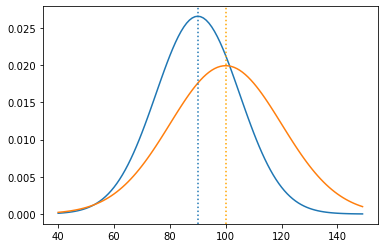

In [161]:
x = np.arange(40, 150)
y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)

plt.plot(x, y1, label='office_1')
plt.plot(x, y2, label='office_2')

plt.axvline(90, ls=':')
plt.axvline(100, ls=':', color='orange')

normality: we were told it's normal

independence: offices are separate

variance: perform a levene test

In [165]:
stats.levene(office_1, office_2)

LeveneResult(statistic=1.254566537126972, pvalue=0.2657297515629138)

In [167]:
stats.ttest_ind(office_1, office_2, equal_var='False')

Ttest_indResult(statistic=-2.5114274811105535, pvalue=0.01384990665555991)

In [169]:
# as we can see above the ttest taken from simulated data is fairly simular to the one taken from stats data


In [170]:
stats.ttest_ind_from_stats(90,15,40,100,20,50,equal_var='False')

Ttest_indResult(statistic=-2.6252287036468456, pvalue=0.01020985244923939)

# Load the mpg dataset and use it to answer the following questions:

In [8]:
mpg = sns.load_dataset('mpg')
mpg.model_year.unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [9]:
data('mpg', show_doc='True')

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [11]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

**Set the _Hypothesis_:**

  * $H_{0}$: The average fuel efficiency of cars from 2008 == The average fuel efficiency of cars from 1999
  
  * $H_{a}$: The average fuel efficiency of cars from 2008 != The avaerage fuel efficiency of cars from 1999

In [12]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [16]:
type(mpg)

pandas.core.frame.DataFrame

In [21]:
oh_eight_fuel = mpg[['cty', 'hwy']][mpg.year == 2008]
# oh_eight_fuel = mpg[mpg.year == 2008]['cty', 'hwy']
# 
ninety_nine_fuel = mpg[['cty', 'hwy']][mpg.year == 1999]


In [24]:
len(oh_eight_fuel), len(ninety_nine_fuel)

(117, 117)

In [26]:
av_oh_eight_fuel = (oh_eight_fuel.cty * .55) + (oh_eight_fuel.hwy * .45)

In [28]:
av_oh_eight_fuel.head()

3     24.95
4     25.05
7     22.05
10    23.60
11    22.60
dtype: float64

In [29]:
av_ninety_nine_fuel = (ninety_nine_fuel.cty * .55) + (ninety_nine_fuel.hwy * .45)

<AxesSubplot:>

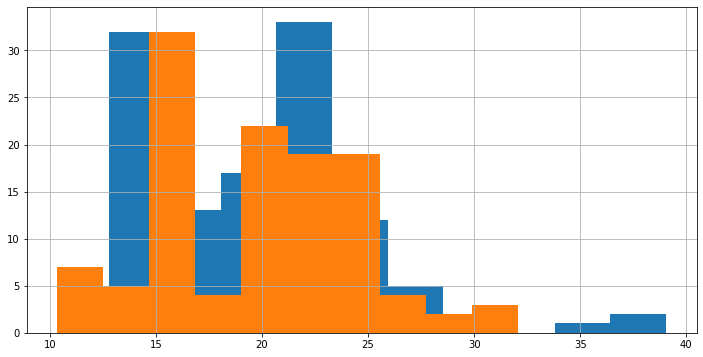

In [31]:
plt.figure(figsize=(12,6))
av_ninety_nine_fuel.hist()
av_oh_eight_fuel.hist()

In [32]:
# we are using a two-sample ttest because the samples are independent and of sufficient size CLT
# lets use the levene to see if the varience is equal or not...
stats.levene(av_oh_eight_fuel, av_ninety_nine_fuel, center='mean')

LeveneResult(statistic=0.013979152127153255, pvalue=0.9059849780909971)

In [ ]:
# The very low tstat and pvalue near 1 means the varience is very simular

In [34]:
t, p = stats.ttest_ind(av_oh_eight_fuel, av_ninety_nine_fuel)

In [35]:
if (p < α):
    print('We can REJECT the null Hypothesis')
else:
    print('We CANNOT reject the null Hypothesis')

We CANNOT reject the null Hypothesis


# Are compact cars more fuel-efficient than the average car?

**Let's set the _Hypotheses_**

 * $H_{0}$: Compact cars average fuel efficiency <= average fuel efficiency for cars
 
 * $H_{a}$: Compact cars average fuel efficiency > average fuel efficiency for cars
 
   * for this we will use a single sample ttest with 1 tails

In [46]:
# first lets set up our arrays
mpg['class'].unique()

compact_fuel_efficiency = mpg[['cty', 'hwy']][mpg['class'] == 'compact']
all_fuel_efficiency = mpg[['cty', 'hwy']]

In [49]:
av_compact_fuel_efficiency = compact_fuel_efficiency.cty * .55 + compact_fuel_efficiency.hwy * .45
av_all_fuel_efficiency = mpg.cty * .55 + mpg.hwy * .45

In [53]:
t, p = stats.ttest_1samp(av_compact_fuel_efficiency, av_all_fuel_efficiency.mean())

In [172]:
mpg['avg_fe'] = stats.hmean(mpg[['cty','hwy']], axis=1)

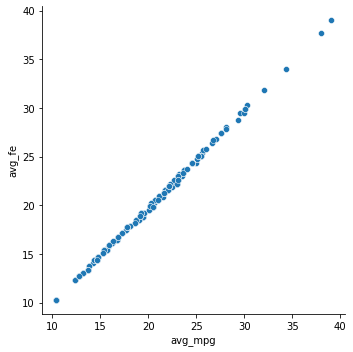

In [175]:
sns.relplot(data=mpg, x='avg_mpg', y='avg_fe')

In [176]:
stats.pearsonr(mpg.avg_mpg, mpg.avg_fe)

(0.9993752439422913, 0.0)

In [55]:
if (t > 0) and ((p/2) < α):
    print('We can REJECT the Null Hypothesis')
else:
    print('We CANNOT reject the Null Hypothesis')

We can REJECT the Null Hypothesis


# Do manual cars get better gas mileage than automatic cars?

### Let's look at manual vs automatic cars...
##### Do manual cars get better gass milage than automatic cars?

 * $H_{0}$: Average Gas mileage of manual cars <= Average Gas Mileage of automatic cars
 
 * $H_{a}$: Average gas mileage of manual cars > Average gas mileage of automatic cars
 \n\n
   * This will be a 2-sample ttest with one tail and we will test the varience before running it

In [56]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [72]:
# mpg.trans = mpg.trans.replace('(15)','', regex=True)

In [76]:
# mpg.trans = mpg.trans.apply(lambda x: x.replace('(15)',''))
mpg.trans = mpg.trans.str.replace(r'\(.*?\)', '', regex=True)

In [177]:
# this is how to do it with .str.contains('*')
mpg.trans.str.contains('manual')

1      False
2       True
3       True
4      False
5      False
       ...  
230    False
231     True
232    False
233     True
234    False
Name: trans, Length: 234, dtype: bool

In [79]:
mpg['avg_mpg'] = mpg.cty * .55 + mpg.hwy * .45

In [82]:
manual_avg_mpg = mpg.avg_mpg[mpg.trans == 'manual']
auto_avg_mpg = mpg.avg_mpg[mpg.trans == 'auto']

In [84]:
len(auto_avg_mpg) + len(manual_avg_mpg) == len(mpg)

True

<AxesSubplot:>

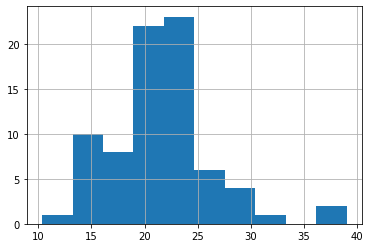

In [91]:
manual_avg_mpg.hist()

<AxesSubplot:>

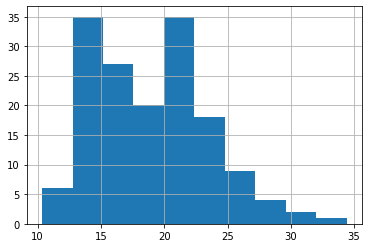

In [92]:
auto_avg_mpg.hist()

In [85]:
# Verified that these are independent smaples
# Now let's check the varience
stats.levene(manual_avg_mpg, auto_avg_mpg)

LeveneResult(statistic=0.12914686962840874, pvalue=0.7196451122833001)

In [86]:
# <!-- with a very low tstat and pvalue approaching 1 we can say that the varience is not similar -->

In [178]:
stats.ttest_ind(manual_avg_mpg, auto_avg_mpg, alternative='greater', equal_var='False')

Ttest_indResult(statistic=4.615440431437591, pvalue=3.247026140700206e-06)

In [179]:
t, p = stats.ttest_ind(manual_avg_mpg, auto_avg_mpg, equal_var='False')

In [180]:
if (t > 0) and ((p / 2) < α):
    print('We can REJECT the Null Hypothesis')
else:
    print('We CANNOT reject the Null Hypothesis')

We can REJECT the Null Hypothesis


# Exercises - Section III - Correlation
Continue working in your `hypothesis_testing` notebook.

1. Use the `telco_churn` data. 

In [100]:
telco_churn = pd.read_csv('telco_churn.csv')

  * Does tenure correlate with monthly charges? 

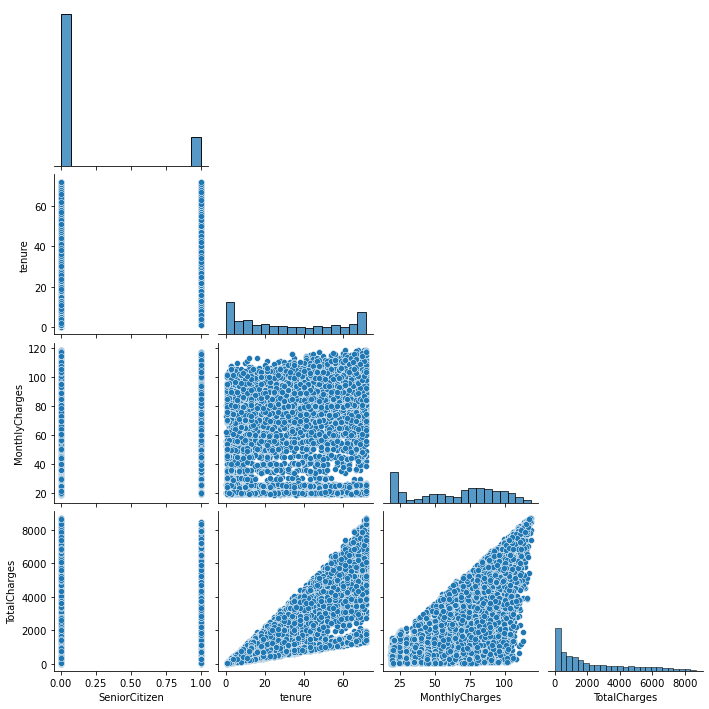

In [101]:
sns.pairplot(telco_churn, corner = True)

In [102]:
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [103]:
telco_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Set the _Hypotheses_**

  * $H_{0}$: There is no correlation between tenure and MonthlyCharges
  * $H_{alt}$: There is a corelation between tenure and MonthlyCharges

In [104]:
x = telco_churn.tenure
y = telco_churn.MonthlyCharges

corr, p = stats.pearsonr(x, y)
corr, p

(0.2478998562861525, 4.094044991483017e-99)

In [ ]:
# There seems to be a very high confidence that 
# tenure and MonthlyCharges have a 25% correlation
# Why does this make sense? 
# Maybe the longer a customer's tenure the more average add_on services they have gotten? 
# This bears further investigation

# -Total charges? 

**Set the _Hypotheses_**

  * $H_{0}$: There is no correlation between tenure and total charges
  * $H_{alt}$: There is a correlation betweem tenure and total charges

In [106]:
telco_churn.TotalCharges.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [107]:
x = telco_churn.tenure[telco_churn.TotalCharges > 0]
y = telco_churn.TotalCharges[telco_churn.TotalCharges > 0]

corr, p = stats.pearsonr(x, y)
corr, p

(0.8258804609332093, 0.0)

In [108]:
print(f'With a p-value = {p} and a correlation of {Percent(corr)} we can REJECT the Null Hypothesis')

With a p-value = 0.0 and a correlation of 82.59% we can REJECT the Null Hypothesis


#### Why Might this be?
  * If we think about the accumulation of charges over time,   
    the main reason Total Charges goes up, is because it can only go up or stop   
    if it stops completely, the tenure number will also stop going up
    
    *  interestingly though, some of the customers with longer tenure   
       do have smaller TotalCharges than some customers with shorter tenure
          
          ...Some longer tenure customers have phone service but no internet?!

  * What happens if you control for phone and internet service?

In [117]:
telco_churn.PhoneService.value_counts()#.unique()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [116]:
telco_churn.InternetService.value_counts()#.unique()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [119]:
# Let's take a look at customers that have internet regardless of whether they have phone service or not
internet_cust = telco_churn[['tenure', 'TotalCharges']]\
[(telco_churn.InternetService != 'No') & (telco_churn.TotalCharges > 0)]

internet_cust

,tenure,TotalCharges
0,1,29.85
1,34,1889.50
2,2,108.15
3,45,1840.75
4,2,151.65
...,...,...
7038,24,1990.50
7039,72,7362.90
7040,11,346.45
7041,4,306.60


In [120]:
x = internet_cust.tenure
y = internet_cust.TotalCharges

corr , p = stats.pearsonr(x, y)
corr, p

(0.931934618741812, 0.0)

In [121]:
print(f'By removing the customers that don\'t have internet we get a {Percent(corr)} Correlation between tenure and TotalCharges')

By removing the customers that don't have internet we get a 93.19% Correlation between tenure and TotalCharges


In [124]:
phone_cust_no_internet = telco_churn[['tenure', 'TotalCharges']]\
[(telco_churn.InternetService == 'No') & (telco_churn.TotalCharges > 0) & (telco_churn.PhoneService == 'Yes')]
phone_cust_no_internet

,tenure,TotalCharges
11,16,326.80
16,52,1022.95
21,12,202.25
22,1,20.15
33,1,20.20
...,...,...
7017,51,1020.75
7019,39,826.00
7020,12,239.00
7030,2,39.25


In [125]:
x = phone_cust_no_internet.tenure
y = phone_cust_no_internet.TotalCharges

corr, p = stats.pearsonr(x, y)
corr, p

(0.9814648859044293, 0.0)

In [126]:
# For phone customers only, the correlation goes up to 98%

In [140]:
dsl_cust = telco_churn[['tenure', 'TotalCharges', 'PhoneService']]\
[(telco_churn.InternetService == 'DSL') & (telco_churn.TotalCharges > 0)]# & (telco_churn.PhoneService == 'Yes')]
dsl_cust

,tenure,TotalCharges,PhoneService
0,1,29.85,No
1,34,1889.50,Yes
2,2,108.15,Yes
3,45,1840.75,No
7,10,301.90,No
...,...,...,...
7029,6,263.05,No
7031,55,3316.10,Yes
7036,12,743.30,No
7038,24,1990.50,Yes


In [138]:
fiber_cust = telco_churn[['tenure', 'TotalCharges', 'PhoneService']]\
[(telco_churn.InternetService == 'Fiber optic') & (telco_churn.TotalCharges > 0)]
fiber_cust

,tenure,TotalCharges,PhoneService
4,2,151.65,Yes
5,8,820.50,Yes
6,22,1949.40,Yes
8,28,3046.05,Yes
12,58,5681.10,Yes
...,...,...,...
7034,67,6886.25,Yes
7035,19,1495.10,Yes
7039,72,7362.90,Yes
7041,4,306.60,Yes


In [129]:
x = dsl_cust.tenure
y = dsl_cust.TotalCharges

corr, p = stats.pearsonr(x, y)
corr, p

(0.9411848215629796, 0.0)

In [130]:
x = fiber_cust.tenure
y = fiber_cust.TotalCharges

corr, p = stats.pearsonr(x, y)
corr, p

(0.9853093528070652, 0.0)

Text(0.5, 1.0, 'The Tenure vs the Total Charges of DSL Customers')

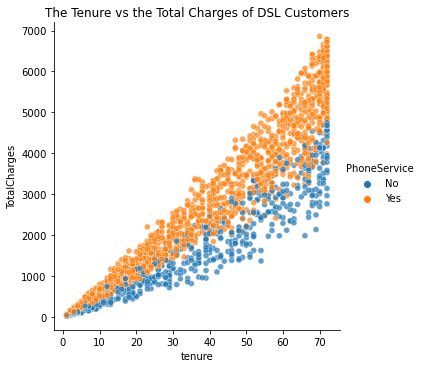

In [290]:
sns.relplot(x=dsl_cust.tenure, y=dsl_cust.TotalCharges, hue=dsl_cust.PhoneService, alpha = .7)
plt.title('The Tenure vs the Total Charges of DSL Customers')

Text(0.5, 1.0, 'The Tenure vs the Total Charges of Fiber Customers')

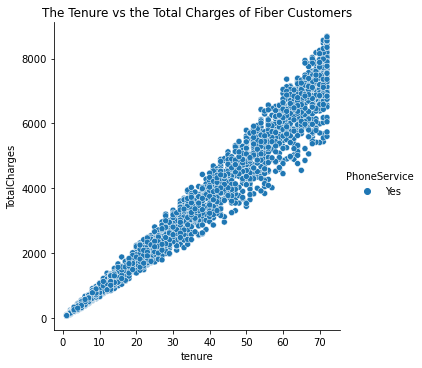

In [139]:
sns.relplot(x=fiber_cust.tenure, y=fiber_cust.TotalCharges, hue=fiber_cust.PhoneService)
plt.title('The Tenure vs the Total Charges of Fiber Customers')

In [142]:
phone_with_internet_options = telco_churn[(telco_churn.TotalCharges > 0) & (telco_churn.MonthlyCharges > 0)]

<Figure size 1440x1440 with 0 Axes>

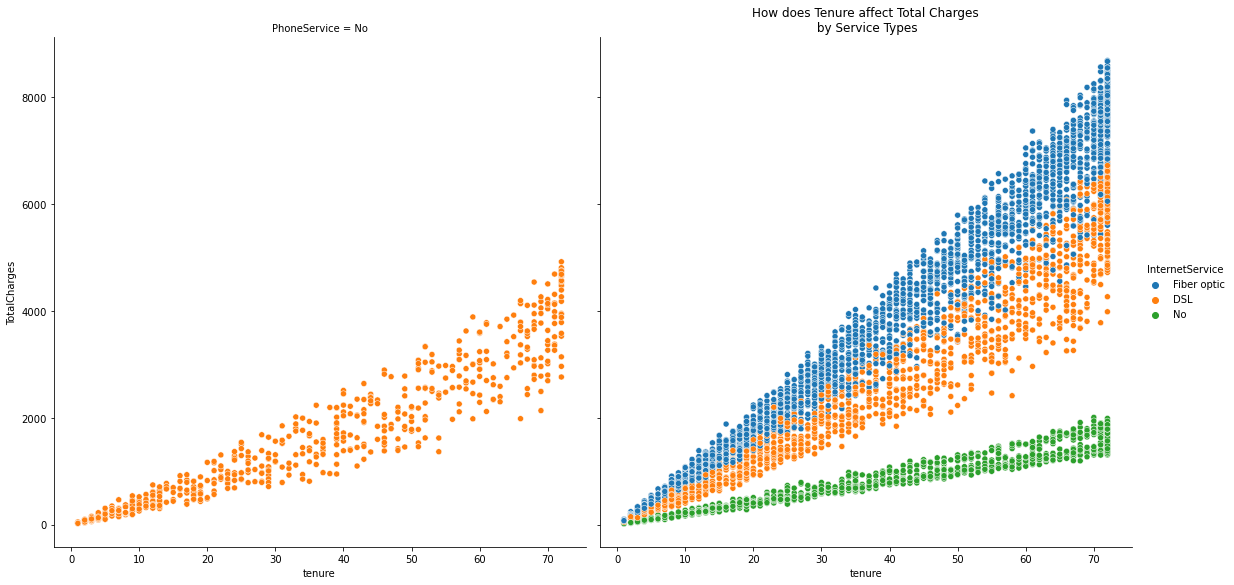

In [244]:
plt.figure(figsize=(20,20))
sns.relplot(x=phone_with_internet_options.tenure,
            y = phone_with_internet_options.TotalCharges, 
            hue = phone_with_internet_options.InternetService,
            hue_order= ['Fiber optic', 'DSL', 'No'],
            col = phone_with_internet_options.PhoneService,
            height = 8,
            style_order=['Yes', 'No']
           )
plt.title(f'How does Tenure affect Total Charges\n by Service Types')
plt.show
plt.savefig('telco_charges')

In [291]:
telco_churn.groupby(['InternetService', 'PhoneService']).count()

customerID  gender  SeniorCitizen  Partner  \
InternetService PhoneService                                               
DSL             No                   682     682            682      682   
                Yes                 1739    1739           1739     1739   
Fiber optic     Yes                 3096    3096           3096     3096   
No              Yes                 1526    1526           1526     1526   

                              Dependents  tenure  MultipleLines  \
InternetService PhoneService                                      
DSL             No                   682     682            682   
                Yes                 1739    1739           1739   
Fiber optic     Yes                 3096    3096           3096   
No              Yes                 1526    1526           1526   

                              OnlineSecurity  OnlineBackup  DeviceProtection  \
InternetService PhoneService                                                   
DSL             No                       682           682               682   
                Yes                     1739          1739              1739   
Fiber optic     Yes                     3096          3096              3096   
No              Yes                     1526          1526              1526   

                              TechSupport  StreamingTV  StreamingMovies  \
InternetService PhoneService                                              
DSL             No                    682          682              682   
                Yes                  1739         1739             1739   
Fiber optic     Yes                  3096         3096             3096   
No              Yes                  1526         1526             1526   

                              Contract  PaperlessBilling  PaymentMethod  \
InternetService PhoneService                                              
DSL             No                 682               682            682   
                Yes               1739              1739           1739   
Fiber optic     Yes               3096              3096           3096   
No              Yes               1526              1526           1526   

                              MonthlyCharges  TotalCharges  Churn  
InternetService PhoneService                                       
DSL             No                       682           680    682  
                Yes                     1739          1736   1739  
Fiber optic     Yes                     3096          3096   3096  
No              Yes                     1526          1520   1526

In [ ]:
def corr_fun(df):
    return pd.series(stats.pearsonr())

# 2. Use the employees database.

In [182]:
salaries = gdb('employees',
   '''
   SELECT e.hire_date, s.salary
			FROM employees e
		JOIN salaries s
			ON s.emp_no = e.emp_no
		WHERE s.to_date > NOW();
   ''')

In [183]:
salaries

,hire_date,salary
0,1986-06-26,88958
1,1985-11-21,72527
2,1986-08-28,43311
3,1986-12-01,74057
4,1989-09-12,94692
...,...,...
240119,1993-01-12,52868
240120,1990-09-27,69501
240121,1986-04-21,83441
240122,1993-10-13,55003


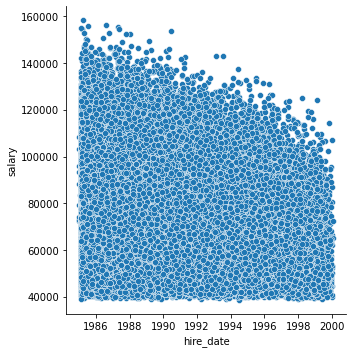

In [184]:
sns.relplot(data=salaries, x= 'hire_date', y= 'salary')

<AxesSubplot:>

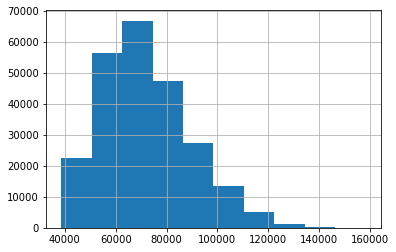

In [186]:
salaries.salary.hist()

#  - Is there a relationship between how long an employee has been with the company and their salary?

In [188]:
salaryΔ = gdb('employees',
             '''
             SELECT e.emp_no, e.hire_date, ss.salary starting_salary, s.salary current_salary
			FROM employees e
		JOIN salaries s
			ON s.emp_no = e.emp_no
        JOIN salaries ss
			ON e.emp_no = ss.emp_no
            WHERE s.to_date > NOW() AND ss.from_date = e.hire_date;
             ''')

In [190]:
salary_bordoy = salaryΔ
salary_bordoy

,emp_no,hire_date,starting_salary,current_salary
0,10001,1986-06-26,60117,88958
1,10004,1986-12-01,40054,74057
2,10005,1989-09-12,78228,94692
3,10007,1989-02-10,56724,88070
4,10009,1985-02-18,60929,94409
...,...,...,...,...
120431,499985,1997-02-11,40000,47543
120432,499986,1985-08-11,91988,119906
120433,499992,1987-05-10,43005,80389
120434,499993,1997-04-07,40000,44305


In [191]:
salary_bordoy['salaryΔ'] = salary_bordoy.current_salary - salary_bordoy.starting_salary

In [200]:
salary_bordoy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120436 entries, 0 to 120435
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   emp_no           120436 non-null  int64 
 1   hire_date        120436 non-null  object
 2   starting_salary  120436 non-null  int64 
 3   current_salary   120436 non-null  int64 
 4   salaryΔ          120436 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


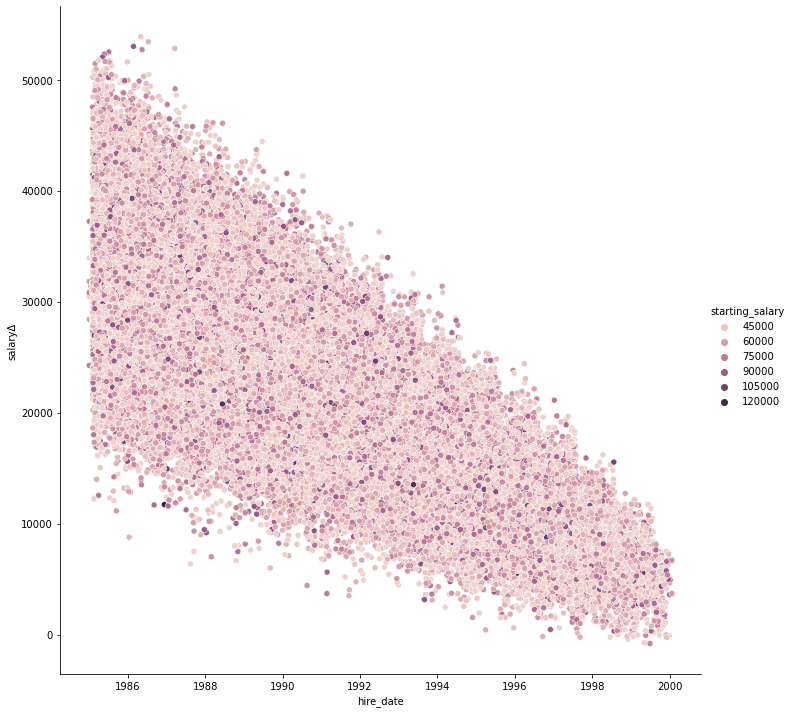

In [205]:
sns.relplot(data=salary_bordoy,
            x= 'hire_date',
            y= 'salaryΔ',
            hue = 'starting_salary',
            height= 10
           
           )

**Set the Hypotheses**
  * $H_{0}$: There is no linear relationship between length of time with the company and salary
  * $H_{a}$: There is a linear relationship between length of time with the company and salary

In [204]:
salary_bordoy['hire_date'] = pd.to_datetime(salary_bordoy['hire_date'])

In [210]:
import datetime

In [222]:
salary_bordoy['time_here'] = (10_000_000 - salary_bordoy['hire_date'].astype(int)/100_000_000_000).astype(int)

In [224]:
stats.pearsonr(salary_bordoy.time_here, salary_bordoy.current_salary)

(0.42384428817703457, 0.0)

In [225]:
stats.pearsonr(salary_bordoy.time_here, salary_bordoy.salaryΔ)

(0.8137150364143235, 0.0)

**With a p-value of 0**

  * There is a **42.38%** correlation between the time with the company and current salary
  * There is an **81.37%** correlation between the time with the company and positive change in salary

#  · Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [226]:
titles = gdb('employees',
             '''
             SELECT e.emp_no, e.hire_date, COUNT(t.emp_no)
			FROM employees e
		JOIN titles t
			ON e.emp_no = t.emp_no
		GROUP BY e.emp_no;
             '''            
            )

In [228]:
titles

,emp_no,hire_date,COUNT(t.emp_no)
0,10001,1986-06-26,1
1,10002,1985-11-21,1
2,10003,1986-08-28,1
3,10004,1986-12-01,2
4,10005,1989-09-12,2
...,...,...,...
300019,499995,1993-01-12,1
300020,499996,1990-09-27,2
300021,499997,1986-04-21,2
300022,499998,1993-10-13,2


In [229]:
titles.hire_date = pd.to_datetime(titles.hire_date)

In [230]:
titles['time_here'] = (10_000_000 - titles['hire_date'].astype(int)/100_000_000_000).astype(int)

In [232]:
titles['titles_no'] = titles['COUNT(t.emp_no)']

([<matplotlib.axis.YTick at 0x33c6be1c0>,
 [Text(0, 0.75, '0.75'), Text(0, 1.0, '1.00'), Text(0, 1.25, '1.25')])

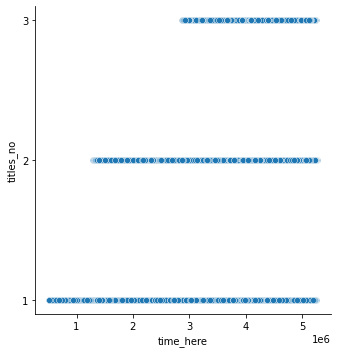

In [234]:
sns.relplot(data=titles, 
            x= 'time_here', 
            y= 'titles_no',
            
           )
plt.yticks([1,2,3])

In [236]:
x = titles.time_here
y = titles.titles_no

r, p = stats.pearsonr(x,y)

In [237]:
if p < .05:
    print(f'''
    We can reject the Hₒ with p-value = {p} and 
    {Percent(r)} correlation between 
    time with the company and number of titles.
    ''')


    We can reject the Hₒ with p-value = 0.0 and 
    26.66% correlation between 
    time with the company and number of titles.
    


# 3. Use the sleepstudy data. Is there a relationship between days and reaction time?

In [261]:
data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [238]:
sleep = data('sleepstudy')

In [240]:
sleep.describe()

,Reaction,Days,Subject
count,180.000000,180.000000,180.000000
mean,298.507892,4.500000,341.277778
std,56.328757,2.880293,20.320905
min,194.332200,0.000000,308.000000
25%,255.375825,2.000000,331.000000
50%,288.650800,4.500000,336.000000
75%,336.752075,7.000000,352.000000
max,466.353500,9.000000,372.000000


In [241]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


In [242]:
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


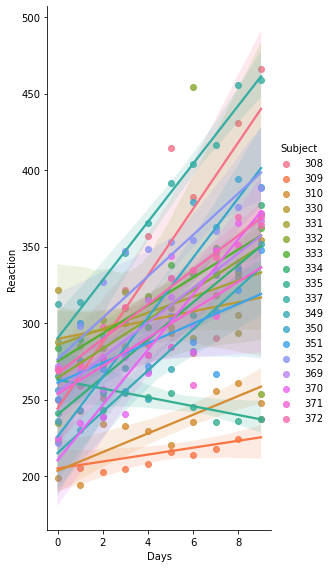

In [292]:
sns.lmplot(data= sleep,
            x = 'Days',
            y = 'Reaction',
            hue = 'Subject',
            height = 8,
            aspect = .5
)

  $H_{0}$: There is no linear relationship between Days and Reaction Time
  
  $H_{a}$: There is a linear relationship between Days and Reaction Time

In [245]:
r,p = stats.pearsonr(sleep.Days, sleep.Reaction)

(0.5352302262650255, 9.89409632221439e-15)

In [248]:
if p < 0.05:
    print(f'''
    We can conclude that with a p_value of {p}
    and a linear correlation of {Percent(r)}
    that we can REJECT the Hₒ
    ''')


    We can conclude that with a p_value of 0.0
    and a linear correlation of 26.66%
    that we can REJECT the Hₒ
    


# Exercises - Part IV - $χ^2$

Continue working in your `hypothesis_testing` notebook.

Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

 	Codeup Student	Not Codeup Student
Uses a Macbook	49	20
Doesn't Use A Macbook	1	30

In [257]:
index = ['Uses Mac', 'No Mac']
columns = ['Codeup', 'No Code']

test = pd.DataFrame([[49, 20], [1,30]], index=index, columns=columns)

# index = ['Churn', 'No Churn']
# columns = ['Product A', 'Product B']

# observed = pd.DataFrame([[100, 50], [120, 28]], index=index, columns=columns)
# n = observed.values.sum()


In [258]:
test


,Codeup,No Code
Uses Mac,49,20
No Mac,1,30


In [259]:
stats.chi2_contingency(test)

(36.65264142122487,
 1.4116760526193828e-09,
 1,
 array([[34.5, 34.5],
        [15.5, 15.5]]))

### Choose another 2 categorical variables from the mpg dataset and perform a $χ^2$ contingency table test with them. Be sure to state your null and alternative hypotheses.

In [260]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg,avg_fe
1,audi,a4,1.8,1999,4,auto,f,18,29,p,compact,22.95,22.212766
2,audi,a4,1.8,1999,4,manual,f,21,29,p,compact,24.60,24.360000
3,audi,a4,2.0,2008,4,manual,f,20,31,p,compact,24.95,24.313725
4,audi,a4,2.0,2008,4,auto,f,21,30,p,compact,25.05,24.705882
5,audi,a4,2.8,1999,6,auto,f,16,26,p,compact,20.50,19.809524
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto,f,19,28,p,midsize,23.05,22.638298
231,volkswagen,passat,2.0,2008,4,manual,f,21,29,p,midsize,24.60,24.360000
232,volkswagen,passat,2.8,1999,6,auto,f,16,26,p,midsize,20.50,19.809524
233,volkswagen,passat,2.8,1999,6,manual,f,18,26,p,midsize,21.60,21.272727


  * $H_{0}$: There is no relation between class and cylinders
  * $H_{a}$: There is a relationship between class and cylinders

In [272]:
cyl_class = mpg[['cyl', 'class']]
cyl_class.cyl.unique()

array([4, 6, 8, 5])

In [274]:
cyl_class['class'].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [276]:
cross_cyl_class = pd.crosstab(cyl_class['class'], cyl_class.cyl)
cross_cyl_class

cyl,4,5,6,8
class,,,,
2seater,0,0,0,5
compact,32,2,13,0
midsize,16,0,23,2
minivan,1,0,10,0
pickup,3,0,10,20
subcompact,21,2,7,5
suv,8,0,16,38


In [277]:
stats.chi2_contingency(cross_cyl_class)

(138.02824375973245,
 1.5351076620141742e-20,
 18,
 array([[ 1.73076923,  0.08547009,  1.68803419,  1.4957265 ],
        [16.26923077,  0.8034188 , 15.86752137, 14.05982906],
        [14.19230769,  0.7008547 , 13.84188034, 12.26495726],
        [ 3.80769231,  0.18803419,  3.71367521,  3.29059829],
        [11.42307692,  0.56410256, 11.14102564,  9.87179487],
        [12.11538462,  0.5982906 , 11.81623932, 10.47008547],
        [21.46153846,  1.05982906, 20.93162393, 18.54700855]]))

With 20 zeros after the decimal for a p_value and a $χ^2$ of 138 we can 

REJECT the Null Hypothesis

there seems to be a relationship.

That said further analysis is needed to determine the nature of the relationship

In [286]:
mpg.manufacturer.nunique()

15

In [288]:
stats.chi2_contingency(pd.crosstab(mpg.manufacturer, mpg['class']))

(464.37214690582,
 5.267718408816259e-54,
 84,
 array([[0.38461538, 3.61538462, 3.15384615, 0.84615385, 2.53846154,
         2.69230769, 4.76923077],
        [0.40598291, 3.81623932, 3.32905983, 0.89316239, 2.67948718,
         2.84188034, 5.03418803],
        [0.79059829, 7.43162393, 6.48290598, 1.73931624, 5.21794872,
         5.53418803, 9.8034188 ],
        [0.53418803, 5.02136752, 4.38034188, 1.17521368, 3.52564103,
         3.73931624, 6.62393162],
        [0.19230769, 1.80769231, 1.57692308, 0.42307692, 1.26923077,
         1.34615385, 2.38461538],
        [0.2991453 , 2.81196581, 2.45299145, 0.65811966, 1.97435897,
         2.09401709, 3.70940171],
        [0.17094017, 1.60683761, 1.4017094 , 0.37606838, 1.12820513,
         1.1965812 , 2.11965812],
        [0.08547009, 0.8034188 , 0.7008547 , 0.18803419, 0.56410256,
         0.5982906 , 1.05982906],
        [0.06410256, 0.6025641 , 0.52564103, 0.14102564, 0.42307692,
         0.44871795, 0.79487179],
        [0.08547009, 0.803

# Use the data from the employees database to answer these questions:

In [293]:
gender_mark = gdb('employees',
    '''
    SELECT e.emp_no, e.gender, d.dept_name dept
			FROM employees e
		JOIN dept_emp de
			ON e.emp_no = de.emp_no
		JOIN departments d
			ON d.dept_no = de.dept_no
        ;
    '''
   )

In [294]:
gender_mark

,emp_no,gender,dept
0,10011,F,Customer Service
1,10038,M,Customer Service
2,10049,F,Customer Service
3,10060,M,Customer Service
4,10088,F,Customer Service
...,...,...,...
331598,499976,M,Sales
331599,499980,M,Sales
331600,499986,F,Sales
331601,499987,F,Sales


In [295]:
gender_mark.dept.value_counts()

Development           85707
Production            73485
Sales                 52245
Customer Service      23580
Research              21126
Marketing             20211
Quality Management    20117
Human Resources       17786
Finance               17346
Name: dept, dtype: int64

### Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

  * $H_{0}$: An employee's gender is independent of whether they work in Marketing or Sales
  * $H_{a}$: An employee's gender is related to whether they work in Marketiing or Sales

In [298]:
gender_df = gender_mark[(gender_mark.dept == 'Sales') | (gender_mark.dept == 'Marketing')]

In [302]:
observed = pd.crosstab(gender_df.gender, gender_df.dept)
observed

dept,Marketing,Sales
gender,,
F,8037,20854
M,12174,31391


In [303]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [301]:
def output_chi2():
    '''
    This function will display the $χ\^2$ contingency output
    
    NOTE: this does not tak in an argument, but assumes 
    that you have saved the following variables using the
    stats.chi2_contingency(observed):
    
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    '''
    #output values
    print('Observed')
    print(observed.values)
    print('\nExpected')
    print(expected.astype(int))
    print('\n----')
    print(f'chi^2 = {chi2:.4f}')
    print(f'p     = {p:.4f}')

In [305]:
output_chi2()

Observed
[[ 8037 20854]
 [12174 31391]]

Expected
[[ 8058 20832]
 [12152 31412]]

----
chi^2 = 0.1311
p     = 0.7173


In [306]:
if p < .05:
    print('We can REJECT the Null Hypothesis')
else:
    print('We CANNOT reject the Null Hypothesis')

We CANNOT reject the Null Hypothesis


# Is an employee's gender independent of whether or not they are or have been a manager?

In [328]:
mgrs_df = gdb('employees',
              '''
		SELECT e.gender, dm.emp_no manager
			FROM employees e
		LEFT JOIN dept_manager dm
			ON e.emp_no = dm.emp_no;
              '''
             )

In [329]:
mgrs_df

,gender,manager
0,M,NaN
1,F,NaN
2,M,NaN
3,M,NaN
4,M,NaN
...,...,...
300019,F,NaN
300020,M,NaN
300021,M,NaN
300022,M,NaN


In [340]:
mgrs_df['ismanager'] = mgrs_df.manager > 0
mgrs_df

,gender,manager,ismanager
0,M,NaN,False
1,F,NaN,False
2,M,NaN,False
3,M,NaN,False
4,M,NaN,False
...,...,...,...
300019,F,NaN,False
300020,M,NaN,False
300021,M,NaN,False
300022,M,NaN,False


  * $H_{0}$: Whether someone **has been a manager** is independent from **Gender**
  * $H_{a}$: Whether someone **has been a manager** is dependent on their **Gender**

In [343]:
observed = pd.crosstab(mgrs_df.gender, mgrs_df.ismanager)
observed

ismanager,False,True
gender,,
F,120038,13
M,179962,11


In [344]:
stats.chi2_contingency(observed)
output_chi2()

Observed
[[120038     13]
 [179962     11]]

Expected
[[ 8058 20832]
 [12152 31412]]

----
chi^2 = 0.1311
p     = 0.7173


In [346]:
if p < .05:
    print('We can REJECT the Null Hypothesis')
else:
    print('We CANNOT reject the Null Hypothesis')

We CANNOT reject the Null Hypothesis
